### Make videos 

In [1]:
import config,csv,json,os,pickle,utils
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import *
print ("Done.")

Done.


### Parse `./video_path.csv`

In [2]:
csv_path = './video_path.csv'
name_and_time = dict()
with open(csv_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    cnt = 0
    for row in csv_reader:
        if cnt > 0: # skip the first line (header)
            name_and_time[row[0]] = (float(row[1]), float(row[2]))
        cnt += 1
# Get video IDs
video_ids = []
for vid_name,(s_t,e_t) in name_and_time.items():
    print ("Name:[%s] [%.2f]s~[%.2f]s"%(vid_name,s_t,e_t))
    video_ids.append(vid_name)
n_vid = len(video_ids)
print ("video_ids:%s"%(video_ids))

Name:[MVI_0005] [0.00]s~[0.00]s
Name:[1X5A1788] [0.00]s~[0.00]s
Name:[1X5A1789] [0.00]s~[0.00]s
Name:[1X5A1790] [0.00]s~[0.00]s
Name:[MVI_0003] [0.00]s~[0.00]s
Name:[MVI_0004] [0.00]s~[0.00]s
video_ids:['MVI_0005', '1X5A1788', '1X5A1789', '1X5A1790', 'MVI_0003', 'MVI_0004']


### Loop to make videos and save them to `videos/NAME_final.mp4`

[0/6] [MVI_0005]


t:   1%|▏         | 9/614 [00:00<00:07, 82.03it/s, now=None]

Moviepy - Building video videos/MVI_0005_final.mp4.
Moviepy - Writing video videos/MVI_0005_final.mp4



Moviepy - Done !
Moviepy - video ready videos/MVI_0005_final.mp4
[videos/MVI_0005_final.mp4] saved.
[1/6] [1X5A1788]


t:   0%|          | 0/909 [00:00<?, ?it/s, now=None]

Moviepy - Building video videos/1X5A1788_final.mp4.
Moviepy - Writing video videos/1X5A1788_final.mp4



Moviepy - Done !
Moviepy - video ready videos/1X5A1788_final.mp4
[videos/1X5A1788_final.mp4] saved.
[2/6] [1X5A1789]


t:   0%|          | 0/857 [00:00<?, ?it/s, now=None]

Moviepy - Building video videos/1X5A1789_final.mp4.
Moviepy - Writing video videos/1X5A1789_final.mp4



Moviepy - Done !
Moviepy - video ready videos/1X5A1789_final.mp4
[videos/1X5A1789_final.mp4] saved.
[3/6] [1X5A1790]
Moviepy - Building video videos/1X5A1790_final.mp4.
Moviepy - Writing video videos/1X5A1790_final.mp4



Moviepy - Done !
Moviepy - video ready videos/1X5A1790_final.mp4
[videos/1X5A1790_final.mp4] saved.
[4/6] [MVI_0003]
Moviepy - Building video videos/MVI_0003_final.mp4.
Moviepy - Writing video videos/MVI_0003_final.mp4



Moviepy - Done !
Moviepy - video ready videos/MVI_0003_final.mp4
[videos/MVI_0003_final.mp4] saved.
[5/6] [MVI_0004]
Moviepy - Building video videos/MVI_0004_final.mp4.
Moviepy - Writing video videos/MVI_0004_final.mp4



Moviepy - Done !
Moviepy - video ready videos/MVI_0004_final.mp4
[videos/MVI_0004_final.mp4] saved.
Done.


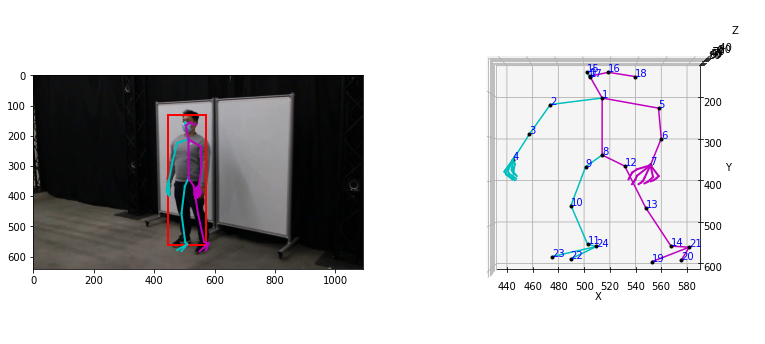

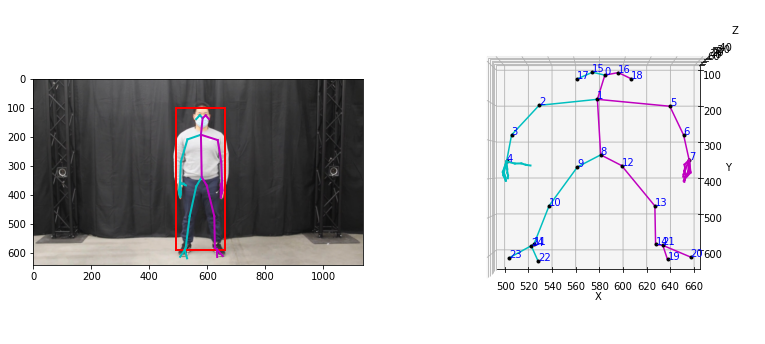

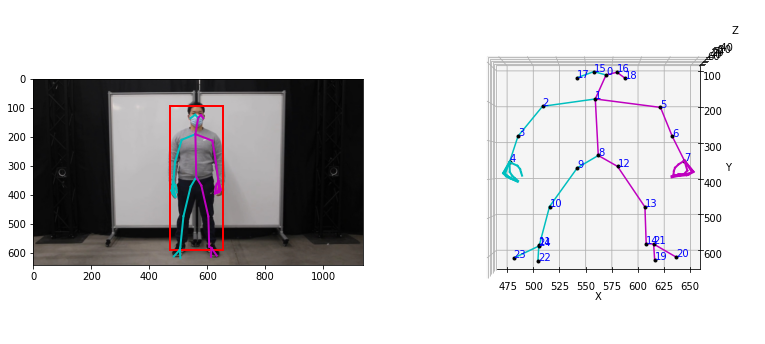

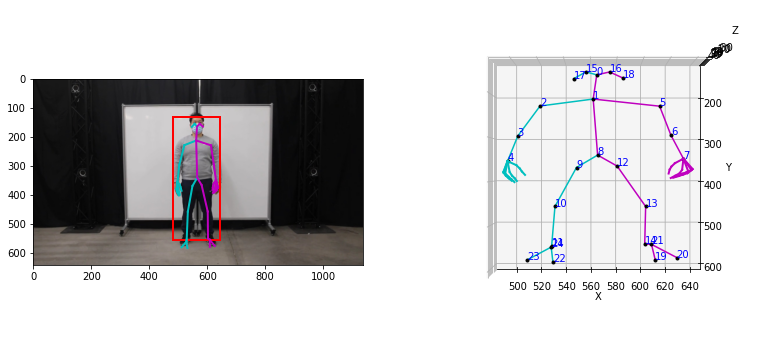

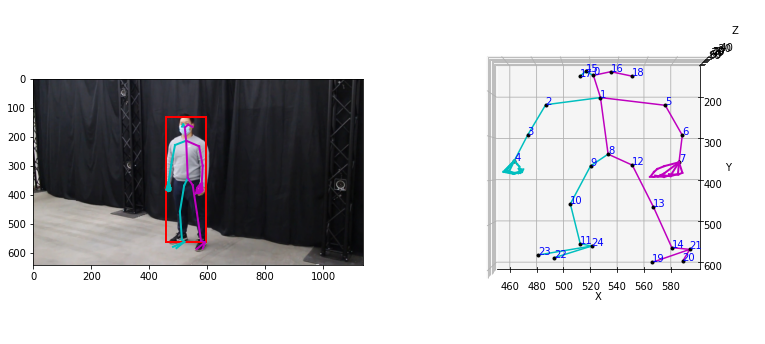

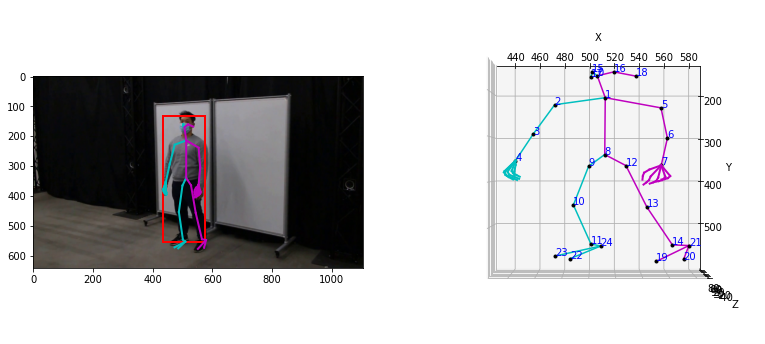

In [3]:
os.makedirs('./videos/tmp_imgs', exist_ok=True) # make a temporary folder 
for v_idx,video_id in enumerate(video_ids):
    print ("[%d/%d] [%s]"%(v_idx,len(video_ids),video_id))
    pkl_dir = os.path.join(config.skeleton_pkl_dir, video_id)
    npz_dir = os.path.join(config.skeleton_npz_dir, video_id)
    pkl_list = sorted(os.listdir(pkl_dir))
    npz_list = sorted(os.listdir(npz_dir))

    fig = plt.figure(figsize=(13, 7))
    ax_1 = fig.add_subplot(121)
    ax_2 = fig.add_subplot(122, projection='3d')
    for ii, i in enumerate(range(len(pkl_list))):
        fp = pkl_list[i]
        bbox_fp = os.path.join(config.mocap_dir, video_id, 'bbox', fp[:-4]+'_bbox.json')
        bbox = json.load(open(bbox_fp, 'rb'))
        img_fp = os.path.join(config.image_dir, video_id, fp[:-4]+'.jpg')
        img = plt.imread(img_fp)
        ### get bbox size
        bbox_np = np.array(bbox['body_bbox_list'])
        # bbox_size = [bb[2]*bb[3] for bb in bbox_np]
        bbox_size = [bb[0] for bb in bbox_np] # based on rightmost..
        ### only choose the biggest bbox
        max_idx = np.argmax(bbox_size)
        curr_bbox = bbox_np[max_idx]
        curr_pkl = pickle.load(open(os.path.join(pkl_dir, fp), 'rb'))
        curr_npz = np.load(os.path.join(npz_dir, fp.replace('pkl', 'npz')))
        ### [PKL] Plot 2D result
        ax_1.clear()
        ax_1.imshow(img)
        utils.plot_2D(curr_pkl['open_pose'], config.open_pose_dict, 
                      curr_pkl['left_hand'], curr_pkl['right_hand'], config.hand_dict,
                      curr_bbox, ax_1)
        ### [PKL] Plot 3D result
        ax_2.clear()
        utils.plot_3D(curr_pkl['open_pose'],curr_pkl['left_hand'],curr_pkl['right_hand'],
                      config.open_pose_dict, config.hand_dict, ax_2)
        # Save image
        fig.savefig('./videos/tmp_imgs/{0:04}.jpg'.format(ii))
    # Make them into a video
    tmp_img_path = ['./videos/tmp_imgs/{0:04}.jpg'.format(x) 
                    for x in range(len(pkl_list))]
    clips = [ImageClip(m).set_duration(1/10) for m in tmp_img_path]
    concat_clip = concatenate_videoclips(clips, method="compose")
    vid_path = 'videos/%s_final.mp4'%(video_id)
    concat_clip.write_videofile(vid_path, fps=10) # save
    print ("[%s] saved."%(vid_path))

print ("Done.")

### Remove all tmp images

In [4]:
for file in os.listdir('./videos/tmp_imgs/'):
    if file.endswith('.jpg'):
        os.remove(os.path.join('./videos/tmp_imgs/',file))
print ("Done.")

Done.
